In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Initialise parameters:
num_of_agents = 10 # number of agents
Timesteps = 10 # timesteps
R = 0.2 # confidence bound


In [98]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]

In [99]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [100]:
# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

array([[0.03076405, 0.2326595 , 0.26601932, 0.31072201, 0.52680609,
        0.57173835, 0.59646659, 0.65417674, 0.75536712, 0.76735674],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.58729694,
        0.64531861, 0.64531861, 0.64531861, 0.66902111, 0.66902111],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.64354916,
        0.64354916, 0.64354916, 0.64354916, 0.64354916, 0.64354916],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.64354916,
        0.64354916, 0.64354916, 0.64354916, 0.64354916, 0.64354916],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.64354916,
        0.64354916, 0.64354916, 0.64354916, 0.64354916, 0.64354916],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.64354916,
        0.64354916, 0.64354916, 0.64354916, 0.64354916, 0.64354916],
       [0.03076405, 0.26980028, 0.26980028, 0.26980028, 0.64354916,
        0.64354916, 0.64354916, 0.64354916, 0.64354916, 0.64354916],
       [0.03076405, 0.26980028, 0.2698002

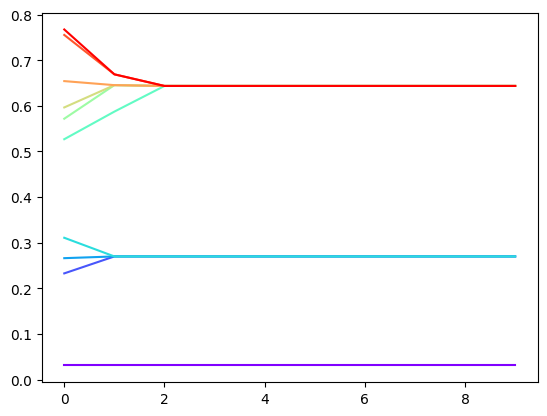

In [101]:
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.show()